# I. Fusion des df-vélib et df_météo

In [1]:
# Import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Définition du chemin d'accès:
### Céline
%cd C:\Users\c.doussot\Desktop\Data Analyst\GitHub\ParisPyVelib_Datas
### Hermine

### Tarik
#%cd C:\Users\Home\Documents\Git\ParisPyVelib\Data

C:\Users\c.doussot\Desktop\Data Analyst\GitHub\ParisPyVelib_Datas


In [2]:
# Import df_meteo
df_meteo = pd.read_csv('2018-2021_donnees-meteo.csv', index_col = 0)

# Import df_velib
df_velib = pd.read_csv('2018-2021_comptage-velo-donnees-compteurs.csv')
df_velib = df_velib.drop(['Unnamed: 0'], axis = 1)
df_velib = df_velib.rename({'Date_count':'Date'}, axis = 1)

# Merge df_velib et df_meteo
df = df_velib.merge(df_meteo, on = 'Date', how = 'left')

- On observe que la longueur du df est plus longue que celle du vélib, cela signifie que la météo a sûrement un comptage sur une période que ne possède pas vélib et crée donc des NANs

In [3]:
# Visualisation du df obtenue:
print(df.isna().sum())
print(len(df))
df.head(20)

Id_old                       0
Address1_old                 0
Id                           0
Address2_old                 0
Count_by_hour                0
Date                         0
Date_instal                  0
Photo_old                    0
Coord_old                    0
Source                       0
Direction                    0
Address                      0
Latitude                     0
Longitude                    0
Coord                        0
Coord_full                   0
Y_Date_Count                 0
M_Date_Count                 0
D_Date_Count                 0
Dweek_Date_Count             0
H_Date_Count                 0
Y_Date_Instal                0
M_Date_Instal                0
D_Date_Instal                0
T°C                    1150176
Precip_last3h          1151470
HR%                    1150176
High_ice               1164409
Wind_speed_mean10mn    1150176
City_meteo             1150090
dtype: int64
1723879


,Id_old,Address1_old,Id,Address2_old,Count_by_hour,Date,Date_instal,Photo_old,Coord_old,Source,...,H_Date_Count,Y_Date_Instal,M_Date_Instal,D_Date_Instal,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn,City_meteo
0,100042374-110042374,VOIE GEORGES POMPIDOU NE-SO,100042374,VOIE GEORGES POMPIDOU,1.0,2018-01-01 00:00:00,2017-12-15 00:00:00,https://www.eco-visio.net/Photos/100042374/151...,"48.848399,2.275932",2018,...,0,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN
1,100042374-109042374,VOIE GEORGES POMPIDOU SO-NE,100042374,VOIE GEORGES POMPIDOU,0.0,2018-01-01 00:00:00,2017-12-15 00:00:00,https://www.eco-visio.net/Photos/100042374/151...,"48.848399,2.275932",2018,...,0,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN
2,100003098-SC,106 AV DENFERT ROCHEREAU NE-SO,100003098,106 AV DENFERT ROCHEREAU NE-SO,3.0,2018-01-01 00:00:00,2012-02-22 00:00:00,https://www.eco-visio.net/Photos/100003098/133...,"48.835143,2.333031",2018,...,0,2012,2,22,NaN,NaN,NaN,NaN,NaN,NaN
3,100003097-SC,105 RUE LA FAYETTE E-O,100003097,105 RUE LA FAYETTE E-O,8.0,2018-01-01 00:00:00,2012-02-13 00:00:00,https://www.eco-visio.net/Photos/100003097/157...,"48.877667,2.350556",2018,...,0,2012,2,13,NaN,NaN,NaN,NaN,NaN,NaN
4,100036719-103036719,18 QUAI DE L'HOTEL DE VILLE SE-NO,100036719,18 QUAI DE L'HOTEL DE VILLE,3.0,2018-01-01 00:00:00,2017-07-12 00:00:00,https://www.eco-visio.net/Photos/100036719/149...,"48.85372,2.35702",2018,...,0,2017,7,12,NaN,NaN,NaN,NaN,NaN,NaN
5,100036718-103036718,39 QUAI FRANÇOIS MAURIAC SE-NO,100036718,39 QUAI FRANÇOIS MAURIAC,0.0,2018-01-01 00:00:00,2017-07-12 00:00:00,https://www.eco-visio.net/Photos/100036718/149...,"48.8344028,2.376941",2018,...,0,2017,7,12,NaN,NaN,NaN,NaN,NaN,NaN
6,100003099-SC,100 RUE LA FAYETTE O-E,100003099,100 RUE LA FAYETTE O-E,4.0,2018-01-01 00:00:00,2012-02-22 00:00:00,https://www.eco-visio.net/Photos/100003099/133...,"48.87746,2.35008",2018,...,0,2012,2,22,NaN,NaN,NaN,NaN,NaN,NaN
7,100003096-SC,97 AV DENFERT ROCHEREAU SO-NE,100003096,97 AV DENFERT ROCHEREAU SO-NE,0.0,2018-01-01 00:00:00,2012-02-22 00:00:00,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968",2018,...,0,2012,2,22,NaN,NaN,NaN,NaN,NaN,NaN
8,100007049-102007049,28 BD DIDEROT E-O,100007049,28 BD DIDEROT,0.0,2018-01-01 00:00:00,2013-01-18 00:00:00,https://www.eco-visio.net/Photos/100007049/135...,"48.846028,2.375429",2018,...,0,2013,1,18,NaN,NaN,NaN,NaN,NaN,NaN
9,100036718-104036718,39 QUAI FRANÇOIS MAURIAC NO-SE,100036718,39 QUAI FRANÇOIS MAURIAC,2.0,2018-01-01 00:00:00,2017-07-12 00:00:00,https://www.eco-visio.net/Photos/100036718/149...,"48.8344028,2.376941",2018,...,0,2017,7,12,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**
- La fusion a bien été réalisée, par contre il y a des NANs à cause du comptage météo toutes les 3 heures, il faudra trouver un moyen de remplacer ces NANs ou de faire une modélisation en utilisant un comptage toutes les 3 heures
- Certaines colonnes peuvent être créées (un nouvel Id plus parlant, une date sans l'heure)
- D'autres colonnes peuvent être supprimées

In [4]:
# Modification de l'Id en reprenant Coord_full (50 Coord + 8 Directions)
df['Coord2'] = df['Coord']
df['Direction2'] = df['Direction']
df['Coord2'] = df['Coord2'].replace(to_replace=list(df['Coord2'].unique()),value = list(range(1,51)))
df['Direction2'] = df['Direction2'].replace(to_replace=list(df['Direction2'].unique()),value = [p/10 for p in range(1, 9)])
df['Id2_old'] = df['Id']
df['Id'] = df['Coord2'] + df['Direction2']

# Création d'une col Datetime reprenant Date pour ensuite modifier Date en enlevant l'heure
df['Date'] = pd.to_datetime(df['Date'])
df['Datetime'] = df['Date']
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Suppression des colonnes non utiles pour la suite:
df = df.drop(['Coord2','Direction2', 'Coord_full', 'Id_old','Id2_old','Address1_old','Address2_old','Photo_old', 'Coord_old'], axis = 1)

# II. Statistique

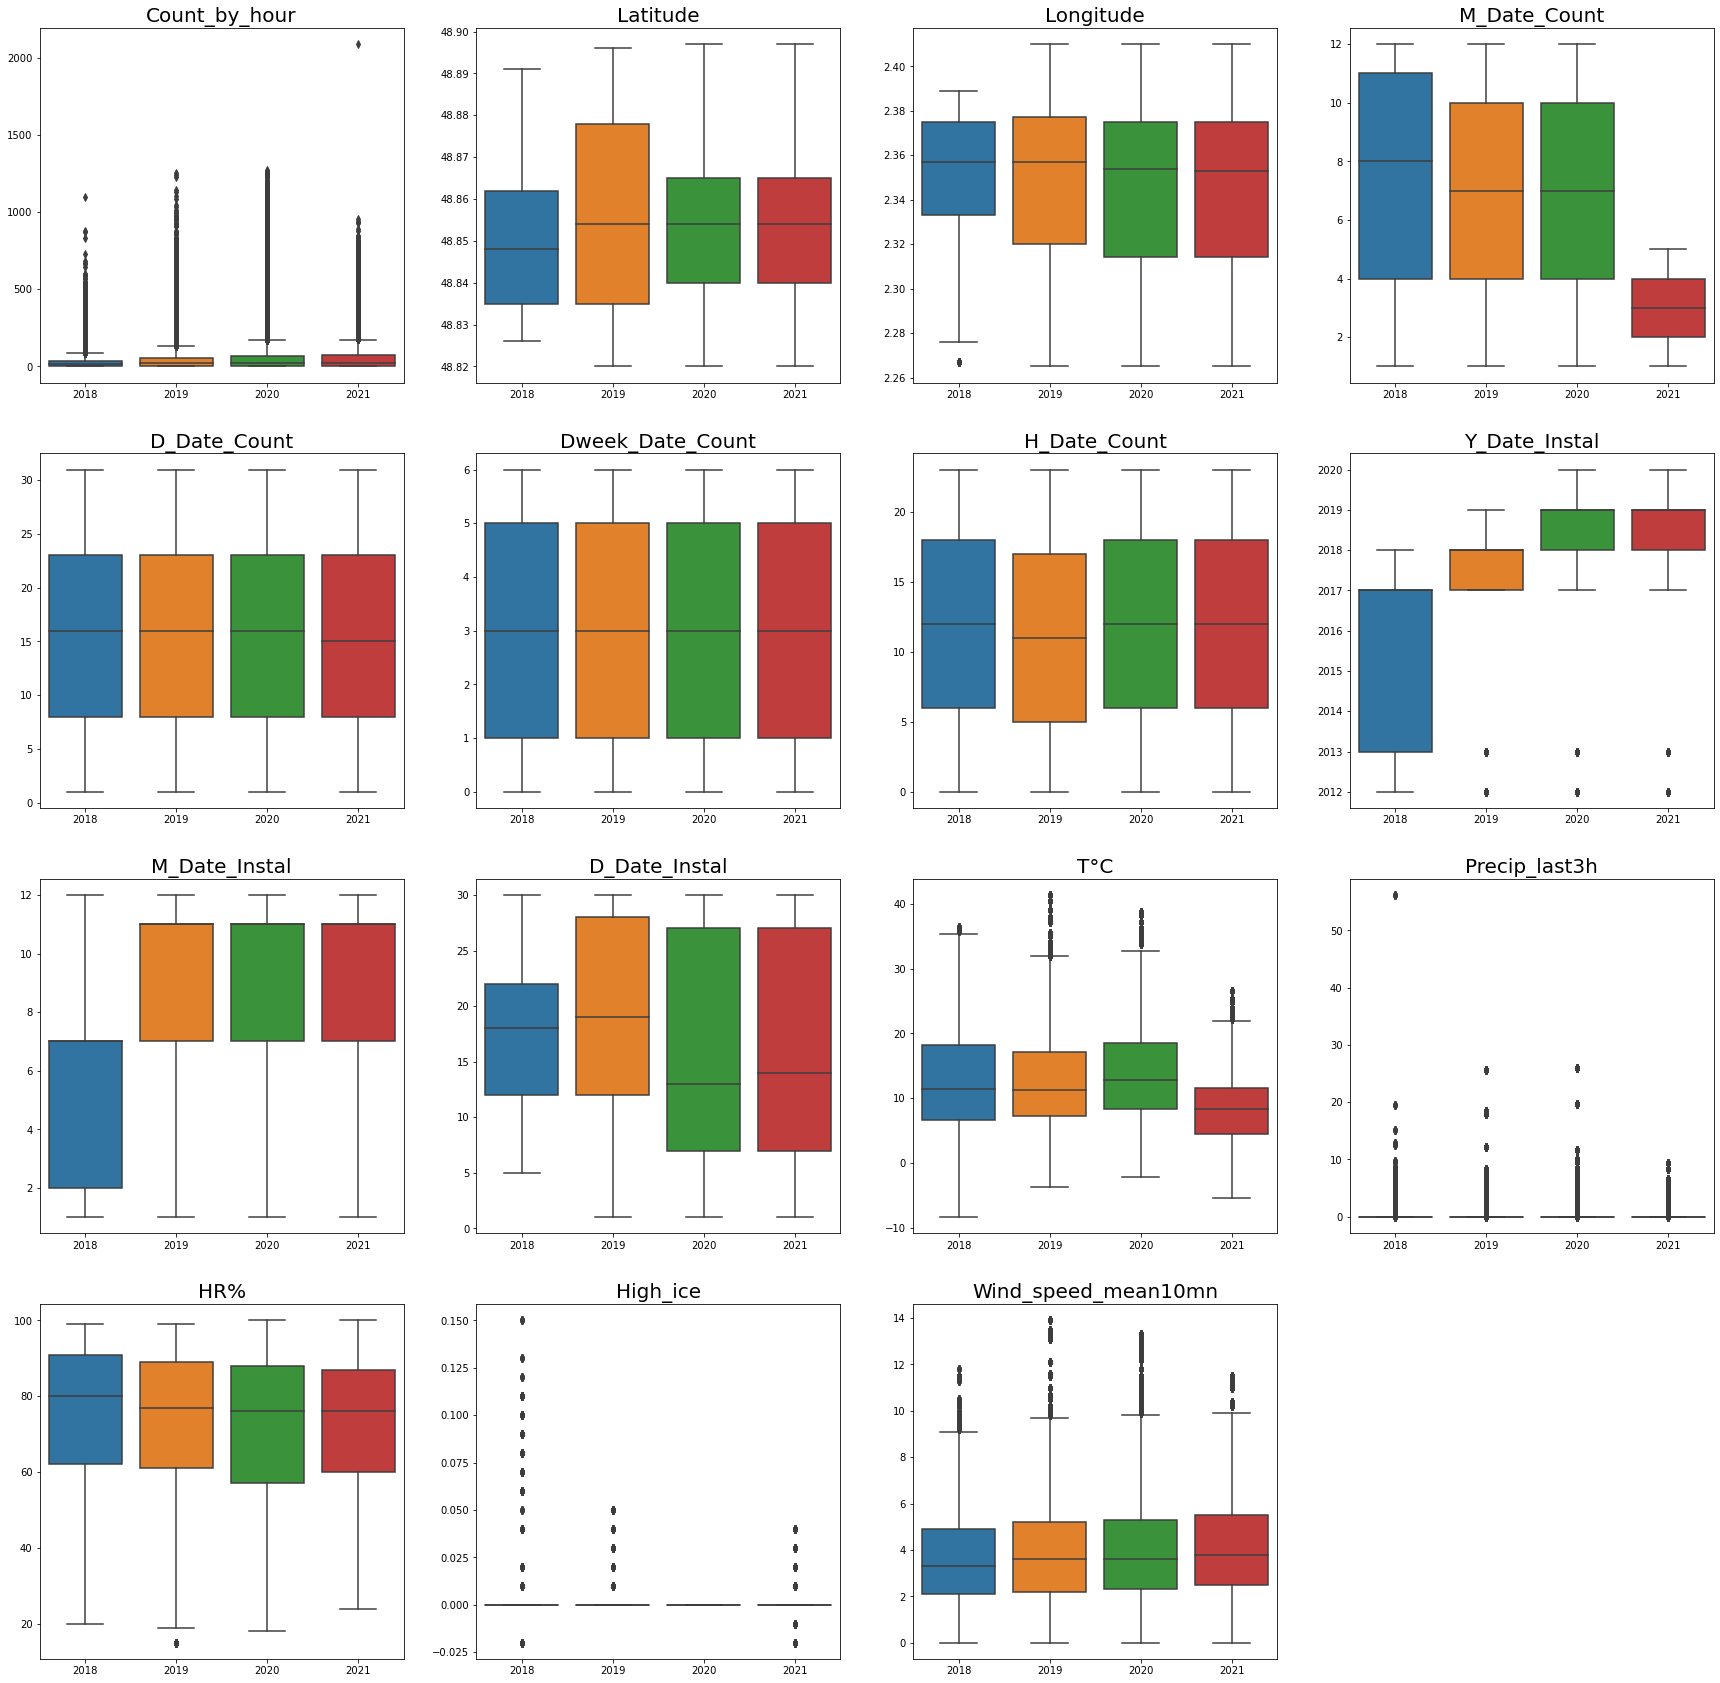

In [5]:
# Boxplot pour visualiser la distribution pour chaque colonne:
Liste_col = ['Count_by_hour', 'Latitude', 'Longitude',
             'M_Date_Count', 'D_Date_Count', 'Dweek_Date_Count', 'H_Date_Count',
             'Y_Date_Instal', 'M_Date_Instal', 'D_Date_Instal',
             'T°C', 'Precip_last3h', 'HR%', 'High_ice','Wind_speed_mean10mn']

fig = plt.figure(figsize = (30,30))
for i, j in enumerate(Liste_col):
    plt.subplot(4,4,i+1)
    sns.boxplot(data = df, y = j, x = 'Y_Date_Count')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(j, size = 20)

**Observations**:
- Count_by_hour: valeur aberrante > 2000
- M_Date_Count: pour 2021 est plus bas mais c'est normal n'ayant que jusqu'à mai
- Y_Date_Instal: beaucoup de nouveaux compteurs sont installés chaque année, les compteurs avant 2017 ont tous été supprimé sauf ceux de 2012 et 2013, à vérifier la fiabilité de ces compteurs étant vieux
- Precip_last3h: Valeur aberrante > 50
- Pour les 3 colonnes (High_ice, Precip_last3h, Count_by_hour) la majorité des valeurs sont à 0, il est préférable de faire un boxplot sur les valeurs différentes de 0 pour plus de précision et vérifier qu'il n'y a pas de valeurs négatives

In [6]:
# Supression des valeurs aberrantes:
df = df[df['Count_by_hour'] < 2000]
#df = df[df['Precip_last3h'] <50] tous les NANs sont également supprimés ce qui n'est pas souhaité
# 14 valeurs sont supérieurs à 50 et correspondent toutes à une même date: df3 = df[df['Date'] == "2018-06-11 23:00:00"]

nombre de données High_ice <0: 3060
nombre de données Precip_last3h <0: 54745
nombre de données Count_by_hour <0: 0


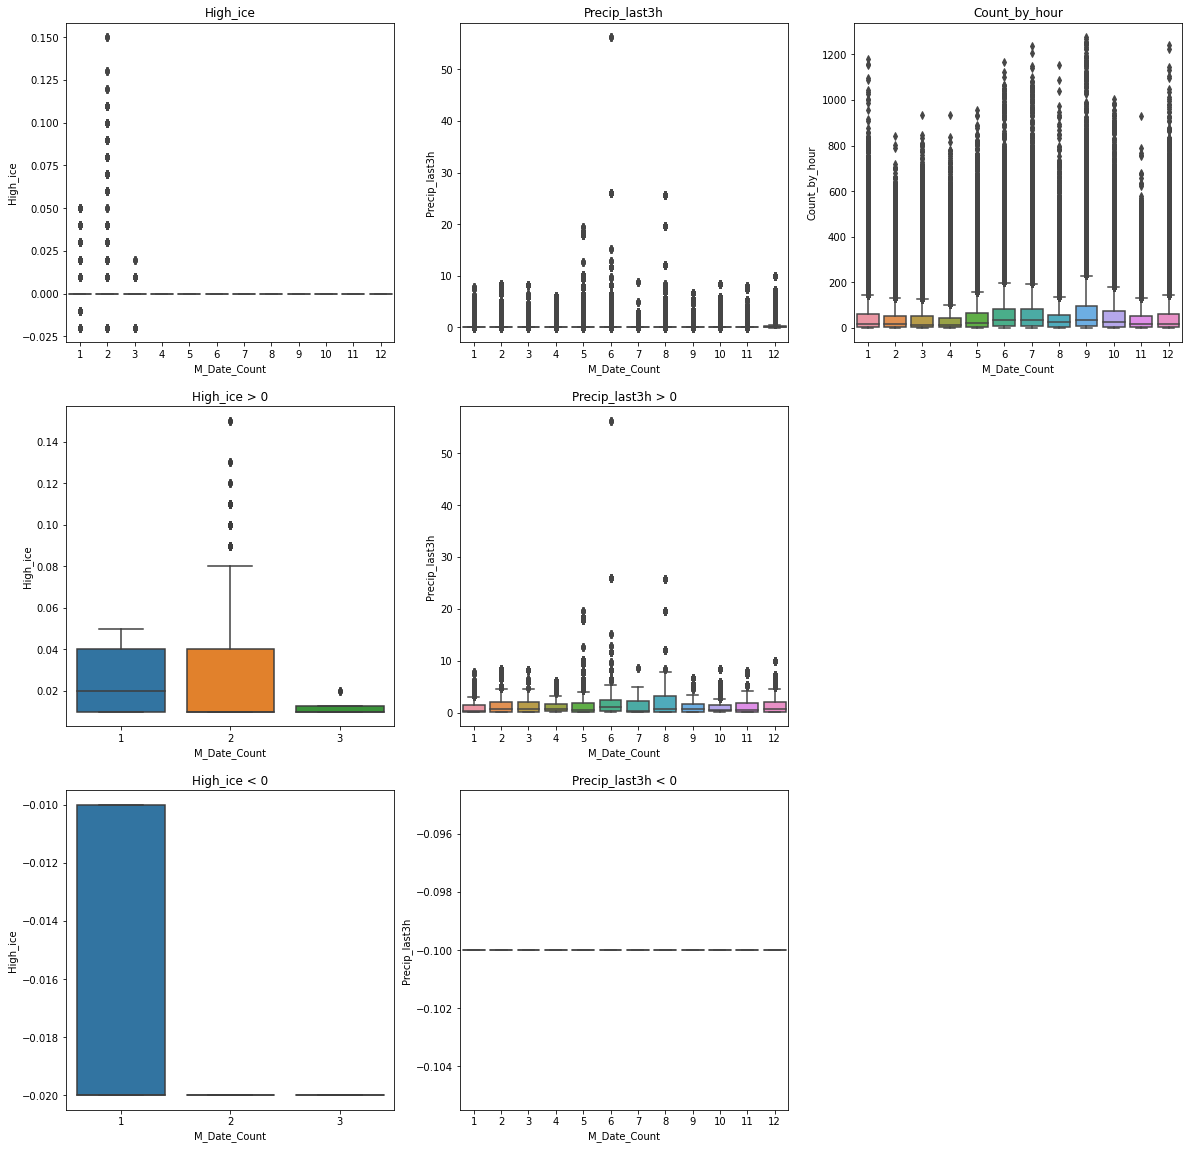

In [7]:
# Observations des boxplots des 3 colonnes
fig = plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
sns.boxplot(data = df, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice')
print('nombre de données High_ice <0:', len(df[df['High_ice'] < 0]))
plt.subplot(3,3,4)
df1 = df[df['High_ice'] > 0]
sns.boxplot(data = df1, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice > 0')
plt.subplot(3,3,7)
df1 = df[df['High_ice'] < 0]
sns.boxplot(data = df1, y = 'High_ice', x = 'M_Date_Count')
plt.title('High_ice < 0')

plt.subplot(3,3,2)
sns.boxplot(data = df, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h')
print('nombre de données Precip_last3h <0:', len(df[df['Precip_last3h'] < 0]))
plt.subplot(3,3,5)
df2 = df[df['Precip_last3h'] > 0]
sns.boxplot(data = df2, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h > 0')
plt.subplot(3,3,8)
df2 = df[df['Precip_last3h'] < 0]
sns.boxplot(data = df2, y = 'Precip_last3h', x = 'M_Date_Count')
plt.title('Precip_last3h < 0')

plt.subplot(3,3,3)
sns.boxplot(data = df, y = 'Count_by_hour', x = 'M_Date_Count');
plt.title('Count_by_hour')
print('nombre de données Count_by_hour <0:', len(df[df['Count_by_hour'] < 0]))

**Observations:**
- High_ice: Il neige que de janvier à mars, les valeurs négatives sont des erreurs, pas facile de savoir si c'est à remplacer par 0 ou par la valeur abs ?
- Precip_last3h: Il pleut toute l'année, les valeurs négatives à -0.1 sont des erreurs (à remplacer par 0 ou par valeur abs ?)

**Hypothèse : Je fais le choix de remplacer les valeurs négatives par leur absolues**

<AxesSubplot:xlabel='M_Date_Count', ylabel='Precip_last3h'>

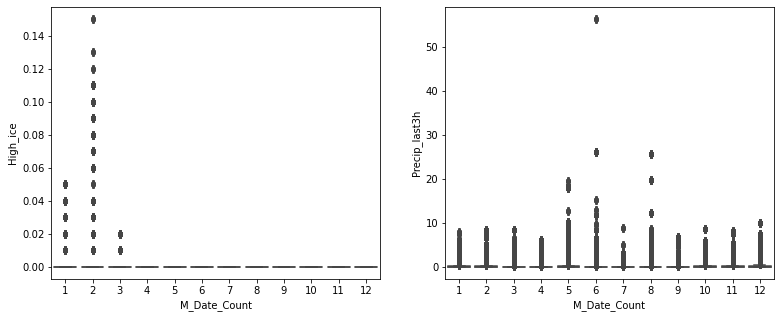

In [8]:
# Remplacement des valeurs négatives par positive:
df['High_ice'] = abs(df['High_ice'])
df['Precip_last3h'] = abs(df['Precip_last3h'])

# Affichage des boxplot
fig = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.boxplot(data = df, y = 'High_ice', x = 'M_Date_Count')
plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Precip_last3h', x = 'M_Date_Count')

In [9]:
df = df.sort_values(by = ['Id', 'Datetime'])
df.index = range(len(df.index))
df.head(50)

,Id,Count_by_hour,Date,Date_instal,Source,Direction,Address,Latitude,Longitude,Coord,...,Y_Date_Instal,M_Date_Instal,D_Date_Instal,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn,City_meteo,Datetime
0,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00
1,1.1,3.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,8.4,0.0,72.0,0.0,7.0,Athis-Mons,2018-01-01 01:00:00
2,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 02:00:00
3,1.1,2.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 03:00:00
4,1.1,0.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,7.8,0.0,69.0,0.0,6.8,Athis-Mons,2018-01-01 04:00:00
5,1.1,0.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 05:00:00
6,1.1,3.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 06:00:00
7,1.1,2.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,6.0,0.0,81.0,0.0,5.4,Athis-Mons,2018-01-01 07:00:00
8,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 08:00:00
9,1.1,2.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,2017,12,15,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 09:00:00


# III. Supression des NANs + ajout de colonnes (j fériés, vac, confinement)

In [10]:
# Suppression des NANs dans météo afin d'avoir des valeurs toutes les heures
    # Faire la moyenne entre t3 et t0 pour fillna t1 et t2 pour les col T°C, HR%, High_ice et Wind_speed_mean10mn
    # Diviser par 3 les valeurs de Precip_last3h puis faire un fillback de t3 sur t2 et t1
    # Faire un fill na avec la ville pour City_meteo  
    
df.isna().sum()

# TA pas de na sauf pour High_ice qui à plusieurs valeurs à 0
# CD j'ai résolue le problème des NANs: en voulant enlever les valeurs aberrantes j'avais supprimé tous les NANs..., j'ai finalement conservé les valeurs aberrantes pour le moment

Id                           0
Count_by_hour                0
Date                         0
Date_instal                  0
Source                       0
Direction                    0
Address                      0
Latitude                     0
Longitude                    0
Coord                        0
Y_Date_Count                 0
M_Date_Count                 0
D_Date_Count                 0
Dweek_Date_Count             0
H_Date_Count                 0
Y_Date_Instal                0
M_Date_Instal                0
D_Date_Instal                0
T°C                    1150175
Precip_last3h          1151469
HR%                    1150175
High_ice               1164408
Wind_speed_mean10mn    1150175
City_meteo             1150089
Datetime                     0
dtype: int64

In [11]:
# Ajout des colonnes
    # jour férier (0 ou 1)
    # vacance (0 ou 1)
    # confinement (0, 1, 2 ou 3) pour les 3 confinements ou (0,1) si seul le 1er confinement est conservé ?

In [12]:
# Chargement du dataset. Source : https://www.data.gouv.fr/fr/datasets/jours-feries-en-france/
df_jour_ferie = pd.read_csv('jours_feries_metropole.csv')

# filtrage du dataset sur les années
df_jour_ferie = df_jour_ferie[(df_jour_ferie.annee > 2017)]
df_jour_ferie = df_jour_ferie[(df_jour_ferie.annee < 2022)]

# suppression de la variable "zone" et annee
df_jour_ferie = df_jour_ferie.drop(columns=['zone'])
df_jour_ferie = df_jour_ferie.drop(columns=['annee'])

# passage en datetime
df_jour_ferie['date'] = pd.to_datetime(df_jour_ferie['date'])

# reset de l'index
df_jour_ferie = df_jour_ferie.reset_index(drop=True)

# rename
df_jour_ferie = df_jour_ferie.rename(columns={"date": "Date"})

In [13]:
# Chargement du dataset. Source : https://www.data.gouv.fr/fr/datasets/vacances-scolaires-par-zones/

# Depuis janvier 2016 :
# Zone A : Académies de Besançon, Bordeaux, Clermont-Ferrand, Dijon, Grenoble, Limoges, Lyon, Poitiers
# Zone B : Académies d'Aix-Marseille, Amiens, Caen, Lille, Nantes, Nice, Nancy-Metz, Orléans-Tours, Reims, Rennes, Rouen, Strasbourg
# Zone C : Académies de Créteil, Montpellier, Paris, Versailles, Toulouse

df_vac_scolaire = pd.read_csv('data_vacances_scolaires.csv')

# passage en datetime et selection des dates
df_vac_scolaire['date'] = pd.to_datetime(df_vac_scolaire['date'])
mask = (df_vac_scolaire['date'] >= '2018-01-01') & (df_vac_scolaire['date'] <= '2021-12-31')
df_vac_scolaire = df_vac_scolaire.loc[mask]

# suppression de la variable "zone"
df_vac_scolaire = df_vac_scolaire.drop(columns=['vacances_zone_a', 'vacances_zone_b'])

# reset de l'index
df_vac_scolaire = df_vac_scolaire.reset_index(drop=True)

# rename
df_vac_scolaire = df_vac_scolaire.rename(columns={"date": "Date"})

In [14]:
# chargement du dataset des dates de confinements. Source : TAR
df_confinement = pd.read_csv('Date_confinement.csv')

In [15]:
# Version Céline

print('''dimension de l'ancien df''', df.shape)

df_jour_ferie['Date'] = df_jour_ferie['Date'].astype('string')
df_vac_scolaire['Date'] = df_vac_scolaire['Date'].astype('string')
# Merge des des jours fériés au df
df = df.merge(right = df_jour_ferie, on='Date', how='left')
# Merge des vacances au df
df = df.merge(right = df_vac_scolaire, on='Date', how='left')
# Merge des confinnements au df
df = df.merge(right = df_confinement, on='Date', how='left')

print('''dimension du nouveau df''', df.shape)

dimension de l'ancien df (1723878, 25)
dimension du nouveau df (1723878, 29)


In [16]:
# Supression des NANs
df['Confinement_id'] = df['Confinement_id'].fillna(value='None')
df['nom_jour_ferie'] = df['nom_jour_ferie'].fillna(value='None')
df['nom_vacances'] = df['nom_vacances'].fillna(value='None')

In [17]:
print(df.isna().sum())
df.head()

Id                           0
Count_by_hour                0
Date                         0
Date_instal                  0
Source                       0
Direction                    0
Address                      0
Latitude                     0
Longitude                    0
Coord                        0
Y_Date_Count                 0
M_Date_Count                 0
D_Date_Count                 0
Dweek_Date_Count             0
H_Date_Count                 0
Y_Date_Instal                0
M_Date_Instal                0
D_Date_Instal                0
T°C                    1150175
Precip_last3h          1151469
HR%                    1150175
High_ice               1164408
Wind_speed_mean10mn    1150175
City_meteo             1150089
Datetime                     0
nom_jour_ferie               0
vacances_zone_c              0
nom_vacances                 0
Confinement_id               0
dtype: int64


,Id,Count_by_hour,Date,Date_instal,Source,Direction,Address,Latitude,Longitude,Coord,...,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn,City_meteo,Datetime,nom_jour_ferie,vacances_zone_c,nom_vacances,Confinement_id
0,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,1er janvier,True,Vacances de Noël,None
1,1.1,3.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,0.0,72.0,0.0,7.0,Athis-Mons,2018-01-01 01:00:00,1er janvier,True,Vacances de Noël,None
2,1.1,1.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,NaN,NaN,NaN,NaN,NaN,2018-01-01 02:00:00,1er janvier,True,Vacances de Noël,None
3,1.1,2.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,NaN,NaN,NaN,NaN,NaN,2018-01-01 03:00:00,1er janvier,True,Vacances de Noël,None
4,1.1,0.0,2018-01-01,2017-12-15 00:00:00,2018,NE-SO,VOIE GEORGES POMPIDOU,48.848,2.276,"48.84800,2.27600",...,0.0,69.0,0.0,6.8,Athis-Mons,2018-01-01 04:00:00,1er janvier,True,Vacances de Noël,None


# IV. Création d'un df_day et test de corrélation sur les 2 dfs

In [18]:
# Création d'un df_day pour faire un comptage moyen horaire par jour (au lieu de par heure pour df)
df_hour = df

col_sum = ['Precip_last3h']
col_mean = ['Count_by_hour', 'T°C', 'HR%', 'High_ice', 'Wind_speed_mean10mn']
col = ['Id', 'Date','M_Date_Instal','nom_jour_ferie',
       'Source', 'Direction', 'Latitude', 'Longitude','Coord',
       'Y_Date_Count','M_Date_Count', 'D_Date_Count', 'Dweek_Date_Count', 
       'vacances_zone_c', 'nom_vacances', 'Confinement_id','Y_Date_Instal']
        #'City_meteo','Address','Date_instal','D_Date_Instal','H_Date_Count','Datetime' 
        # ne sont pas ajoutées sinon len(df2) est plus long ce qui n'est pas normal
dic = {}
for i in col_sum:
    dic[i] = 'sum'
for j in col_mean:
    dic[j] = 'mean'

df_day = df.groupby(col).agg(dic).reset_index()

print('df_hour:', len(df_hour))
print('df_day:', len(df_day))
print('df_hour/24h:', len(df_hour)/24)

df_hour: 1723878
df_day: 70162
df_hour/24h: 71828.25


In [19]:
# Test de correlation de df_hour sur les valeurs num et affichage des résultats sur la variable cible "Count_by_hour"
df2 = df_hour.corr()
df2['ABS'] = abs(df2['Count_by_hour'])
df2 = df2[['Count_by_hour', 'ABS']]
df2.sort_values(by = 'ABS', ascending = False)

,Count_by_hour,ABS
Count_by_hour,1.000000,1.000000
H_Date_Count,0.250165,0.250165
T°C,0.197006,0.197006
HR%,-0.192205,0.192205
Latitude,0.103027,0.103027
Source,0.088356,0.088356
Y_Date_Count,0.088356,0.088356
Y_Date_Instal,0.080911,0.080911
Dweek_Date_Count,-0.080754,0.080754
Id,0.075557,0.075557


In [20]:
# Test de correlation de df_day sur les valeurs num et affichage des résultats sur la variable cible "Count_by_hour"
df2 = df_day.corr()
df2['ABS'] = abs(df2['Count_by_hour'])
df2 = df2[['Count_by_hour', 'ABS']]
df2.sort_values(by = 'ABS', ascending = False)

,Count_by_hour,ABS
Count_by_hour,1.000000,1.000000
Latitude,0.167807,0.167807
T°C,0.145553,0.145553
Source,0.144879,0.144879
Y_Date_Count,0.144879,0.144879
Dweek_Date_Count,-0.131153,0.131153
Longitude,0.126686,0.126686
Id,0.120221,0.120221
Y_Date_Instal,0.118720,0.118720
HR%,-0.097874,0.097874


- Il est surprenant de voir que les p-values sont toutes basse <25% alors que l'on sait que beaucoup de paramètres comme le mois de comptage, la hauteur de neige... sont fortement corrélés à la fréquentation des vélos.

In [21]:
# Enregister les nouveau df sous format csv
df_hour.to_csv('2018-2021_donnees-velib-meteo_hour.csv')
df_day.to_csv('2018-2021_donnees-velib-meteo_day.csv')